In [1]:
# to do:
# add a repeatable block to get > 500 records if initial pull did not 
# enhance exceptions handling
# export printing of results into written log txt
# migrate unfound cities and status codes into separate df
# ISO Code Lookup on countries
# How to integrate state/province where appropriate?
# Visible low humidity in deserts

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
import requests
from datetime import datetime
from config import weather_api_key
import string
from scipy.stats import linregress

In [3]:
lats = np.random.uniform(low=-90, high=90, size=2000)
longs = np.random.uniform(low=-180.0, high=180.0, size=2000)
lat_longs = zip(lats, longs)
lat_longs

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [5]:
coordinates = list(lat_longs)
cities = list()

for coordinate in coordinates:
    city = citipy.nearest_city(latitude=coordinate[0], longitude=coordinate[1])
    if string.capwords(city.city_name) not in cities:
        cities.append(string.capwords(city.city_name)) # capitalizing all names since they came through in lowercase.  source https://favtutor.com/blogs/capitalize-first-letter-python
        
len(cities)

673

In [6]:
city_data = list()


print("Beginning Data Retrieval")
print("-------------------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count = 1
        # time.sleep(60) # delay execution for 60 seconds.  But why?
        
    city_url = base_url + "&q=" + city.replace(" ","+")
    
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    record_count += 1
    
    try:
        #extract the JSON data using API URL
        city_weather = requests.get(city_url).json()
        # print(city_url)
        # print(city_weather)
        
        #parse out data points
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert datetime to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #add to list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Long": city_long,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                           })
        
        print(f"{city} processed successfully.")
        
    except:
        #Change me later to print out the error!
        
        status_code = requests.get(city_url).status_code
        
        if status_code == 404:
            print(f"ERROR: City {city} not found.")
        else:
            print(f"ERROR: City {city} not processed. StatusCode: {status_code}")
        pass
    
print("-------------------------------------")
print("Data Retrieval Complete!")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of set 1 | Ribeira Grande
Ribeira Grande processed successfully.
Processing Record 2 of set 1 | Taolanaro
ERROR: City Taolanaro not found.
Processing Record 3 of set 1 | Partyzany
Partyzany processed successfully.
Processing Record 4 of set 1 | Rikitea
Rikitea processed successfully.
Processing Record 5 of set 1 | Punta Arenas
Punta Arenas processed successfully.
Processing Record 6 of set 1 | Avarua
Avarua processed successfully.
Processing Record 7 of set 1 | Cap-aux-meules
Cap-aux-meules processed successfully.
Processing Record 8 of set 1 | Jardim
Jardim processed successfully.
Processing Record 9 of set 1 | Henties Bay
Henties Bay processed successfully.
Processing Record 10 of set 1 | Honningsvag
Honningsvag processed successfully.
Processing Record 11 of set 1 | Lebu
Lebu processed successfully.
Processing Record 12 of set 1 | Ambilobe
Ambilobe processed successfully.
Processing Record 13 of set 1

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,64.26,91,100,35.37,PT,2021-12-26 00:16:15
1,Partyzany,46.3314,34.7503,42.19,94,91,12.91,UA,2021-12-26 00:16:16
2,Rikitea,-23.1203,-134.9692,77.05,78,100,21.61,PF,2021-12-26 00:16:16
3,Punta Arenas,-53.1500,-70.9167,60.91,36,0,19.57,CL,2021-12-26 00:13:29
4,Avarua,-21.2078,-159.7750,82.45,69,85,11.50,CK,2021-12-26 00:16:17
...,...,...,...,...,...,...,...,...,...
617,Orsk,51.2049,58.5668,-13.90,84,0,6.71,RU,2021-12-26 00:20:33
618,Monroe,43.1501,-77.6831,43.47,96,90,11.50,US,2021-12-26 00:20:33
619,Teruel,40.6667,-0.6667,44.56,93,100,7.20,ES,2021-12-26 00:20:34
620,Saint-augustin,51.2260,-58.6502,28.04,97,85,4.85,CA,2021-12-26 00:20:34


In [8]:
column_order = ["City", "Country", "Date", "Lat", "Long", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-12-26 00:16:15,38.5167,-28.7000,64.26,91,100,35.37
1,Partyzany,UA,2021-12-26 00:16:16,46.3314,34.7503,42.19,94,91,12.91
2,Rikitea,PF,2021-12-26 00:16:16,-23.1203,-134.9692,77.05,78,100,21.61
3,Punta Arenas,CL,2021-12-26 00:13:29,-53.1500,-70.9167,60.91,36,0,19.57
4,Avarua,CK,2021-12-26 00:16:17,-21.2078,-159.7750,82.45,69,85,11.50
...,...,...,...,...,...,...,...,...,...
617,Orsk,RU,2021-12-26 00:20:33,51.2049,58.5668,-13.90,84,0,6.71
618,Monroe,US,2021-12-26 00:20:33,43.1501,-77.6831,43.47,96,90,11.50
619,Teruel,ES,2021-12-26 00:20:34,40.6667,-0.6667,44.56,93,100,7.20
620,Saint-augustin,CA,2021-12-26 00:20:34,51.2260,-58.6502,28.04,97,85,4.85


In [9]:
import os.path
output_data_file = os.path.join("weather_data", "ChristmasWeather.csv")
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting climate charts

In [10]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

today = datetime.utcfromtimestamp(time.time()).strftime("%x")

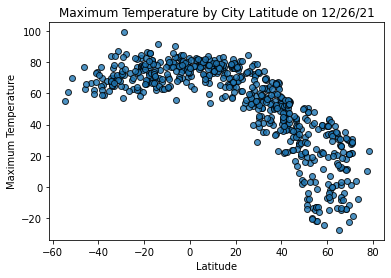

In [11]:
plt.scatter(x = lats,
            y = max_temps,
           edgecolor = "black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"Maximum Temperature by City Latitude on {today}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.savefig("weather_data/Fig1.png")

plt.show()

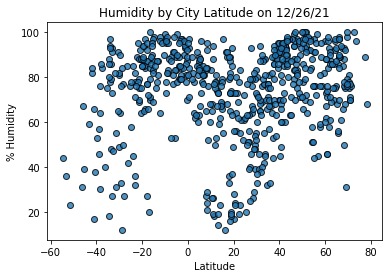

In [12]:
plt.scatter(x = lats,
            y = humidity,
           edgecolor = "black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"Humidity by City Latitude on {today}")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")

plt.savefig("weather_data/Fig2.png")

plt.show()

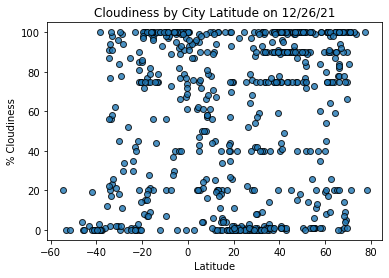

In [13]:
plt.scatter(x = lats,
            y = cloudiness,
           edgecolor = "black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"Cloudiness by City Latitude on {today}")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

plt.savefig("weather_data/Fig3.png")

plt.show()

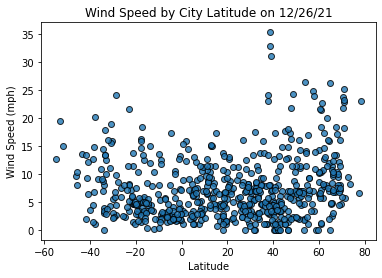

In [14]:
plt.scatter(x = lats,
            y = wind_speed,
           edgecolor = "black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

plt.title(f"Wind Speed by City Latitude on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("weather_data/Fig4.png")

plt.show()

## Linear regression of collected data

Start by creating function.

In [15]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run linear regression against value inputs
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    
    # Create equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create scatter plot and reg line
    plt.scatter(x=x_values,y=y_values)
    plt.plot(x_values,regress_values,"r")
    plt.ylabel(y_label)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    
    plt.show()
    
    print(f"r = {r_value}\np = {p_value}\nstd error = {std_err}")

### Separate latitudes by hemisphere

In [16]:
index13 = city_data_df.loc[13]
index13

City                Half Moon Bay
Country                        US
Date          2021-12-26 00:15:23
Lat                       37.4636
Long                    -122.4286
Max Temp                    50.86
Humidity                       89
Cloudiness                     75
Wind Speed                   1.01
Name: 13, dtype: object

In [17]:
#boolean expression meant to filter dataframe in loc.  Think where clause
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
617     True
618     True
619     True
620     True
621    False
Name: Lat, Length: 622, dtype: bool

In [18]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
2,Rikitea,PF,2021-12-26 00:16:16,-23.1203,-134.9692,77.05,78,100,21.61
3,Punta Arenas,CL,2021-12-26 00:13:29,-53.1500,-70.9167,60.91,36,0,19.57
4,Avarua,CK,2021-12-26 00:16:17,-21.2078,-159.7750,82.45,69,85,11.50
6,Jardim,BR,2021-12-26 00:16:18,-21.4803,-56.1381,75.96,70,20,4.76
7,Henties Bay,NA,2021-12-26 00:16:18,-22.1160,14.2845,61.86,89,0,7.07


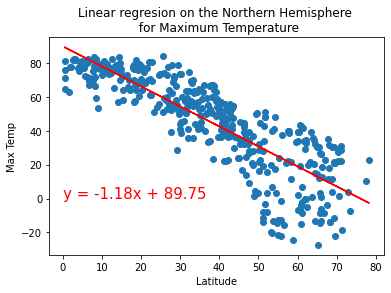

r = -0.8427148514979178
p = 2.533140793194281e-119
std error = 0.036115741036784006


In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear regresion on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',
                       (0,0))

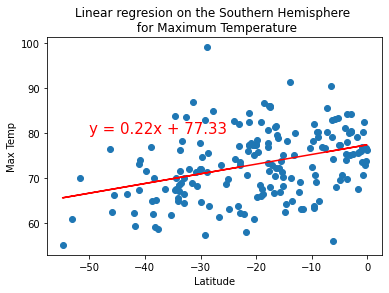

r = 0.36355915221306057
p = 3.923962194171789e-07
std error = 0.04089278062971411


In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear regresion on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',
                       (-50,80))

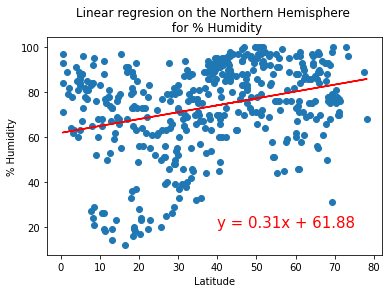

r = 0.30119196365022033
p = 1.2305974651154856e-10
std error = 0.046525995931862504


In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear regresion on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (40,20))

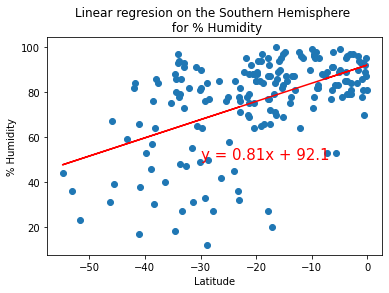

r = 0.5185114067715185
p = 4.728454819305207e-14
std error = 0.09912495387540245


In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear regresion on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',
                       (-30,50))

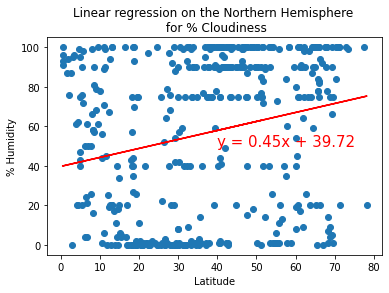

r = 0.2270660307642137
p = 1.575456764601978e-06
std error = 0.09343216663174662


In [23]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Humidity',
                       (40,50))

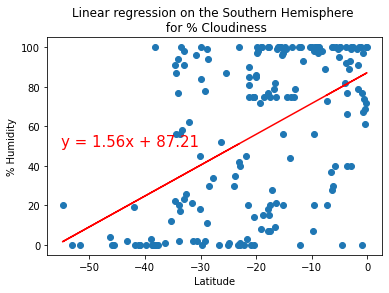

r = 0.5078821774908696
p = 1.856609271192892e-13
std error = 0.19636953740721655


In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Humidity',
                       (-55,50))

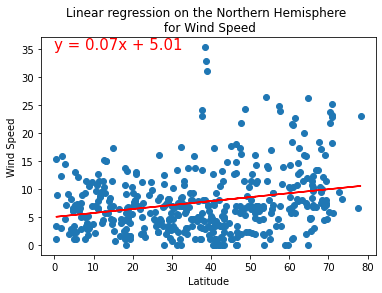

r = 0.24197032055611742
p = 2.9602412245226773e-07
std error = 0.013608352721570316


In [25]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (0,35))

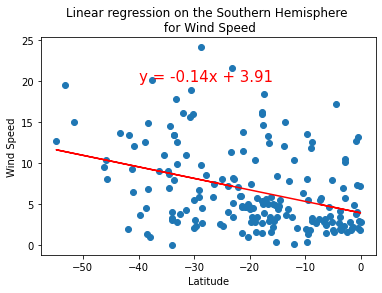

r = -0.36509780387363294
p = 3.4747972986716523e-07
std error = 0.026640960169325368


In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (-40,20))